In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:
dataset=(r"C:\Users\AradhanaSingh\Desktop\titanic_dataset.csv")
titanic_data = pd.read_csv(dataset)


In [148]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,N,Male,Female
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.002245,0.352413,0.647587
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.047351,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


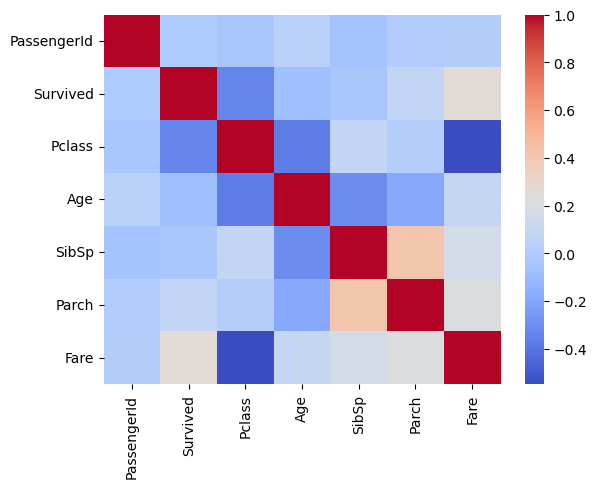

In [150]:
#correlation heatmap
sns.heatmap(titanic_data.corr(numeric_only=True), cmap="coolwarm")
plt.show()


In [151]:
from sklearn.model_selection import StratifiedShuffleSplit 
split=StratifiedShuffleSplit(n_splits=1, test_size=.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex",]]):
 strat_train_set= titanic_data.loc[train_indices]
 strat_test_set= titanic_data.loc[test_indices]

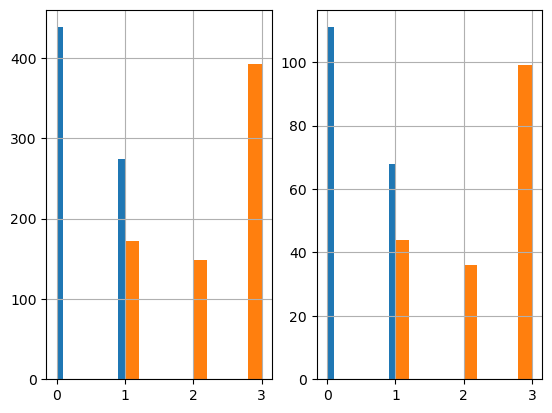

In [152]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [153]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 344 to 736
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          576 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [154]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer=SimpleImputer(strategy="mean")
        X['Age']=imputer.fit_transform(X[['Age']])
        return X

In [155]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
         return self
        
    def transform(self, X):
        encoder=OneHotEncoder()
        
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()

        column_names=["C","S","Q","N"]

        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]

        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names=["Male","Female"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        return X

In [156]:
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureDropper(BaseEstimator, TransformerMixin):
      def fit(self, X, y=None):
         return self
          
      def transform(self, X):
         return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [157]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([("ageimputer",AgeImputer()),
                   ("featureencoder",FeatureEncoder()),
                   ("featuredropper",FeatureDropper()),])

In [158]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [159]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
344,345,0,2,36.00000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
43,44,1,2,3.00000,1,2,41.5792,1.0,0.0,0.0,1.0,0.0
182,183,0,3,9.00000,4,2,31.3875,0.0,0.0,1.0,0.0,1.0
90,91,0,3,29.00000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
311,312,1,1,18.00000,2,2,262.3750,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
218,219,1,1,32.00000,0,0,76.2917,1.0,0.0,0.0,1.0,0.0
107,108,1,3,29.51809,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
270,271,0,1,29.51809,0,0,31.0000,0.0,0.0,1.0,0.0,1.0
298,299,1,1,29.51809,0,0,30.5000,0.0,0.0,1.0,0.0,1.0


In [160]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 344 to 736
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Male         712 non-null    float64
 11  Female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [161]:
from sklearn.preprocessing import StandardScaler
X=strat_train_set.drop(['Survived'], axis=1)
y=strat_train_set['Survived']

scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()

param_gird=[
    {"n_estimators":[10,100,200,500], "max_depth":[None,5,10], "min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [163]:
final_clf=grid_search.best_estimator_

In [164]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [165]:
 strat_test_set= titanic_data.loc[test_indices]
strat_test_set=pipeline.fit_transform(strat_test_set)

In [166]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test=strat_test_set['Survived']

scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [167]:
final_clf.score(X_data_test,y_data_test)

0.8100558659217877

In [168]:
final_data = pipeline.fit_transform(titanic_data)

In [169]:
final_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [170]:
X_final=final_data.drop(['Survived'], axis=1)
y_final=final_data['Survived']

scaler=StandardScaler()
X_final_data=scaler.fit_transform(X_final)
y_final_data=y_final.to_numpy()

In [183]:
prod_clf=RandomForestClassifier()

param_gird=[
    {"n_estimators":[10,100,200,500], "max_depth":[None,5,10], "min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(prod_clf, param_gird, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_final_data,y_final_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [172]:
prod_final_clf=grid_search.best_estimator_

In [184]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=500)

In [174]:
test_dataset=(r"C:\Users\AradhanaSingh\Desktop\test.csv")
titanic_test_data = pd.read_csv(test_dataset)


In [175]:
final_test_data=pipeline.fit_transform(titanic_test_data )

In [176]:
final_test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0


In [177]:
X_final_test=final_test_data
X_final_test=X_final_test.bfill()

scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)


In [178]:
predictions=prod_final_clf.predict(X_data_final_test)

In [179]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [180]:
final_df=pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv(r"C:\Users\AradhanaSingh\Desktop\predictions.csv", index=False)

In [181]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
